<div style="text-align: right"> 26 June, 2017 </div>

<img src="https://valohai.com/static/img/support-logos/keras-text.svg" style=" width: 40%;">

# Keras Tutorial

### by Anne Peter (anne.peter@uni-weimar.de)

---

## 1. What is Keras?

"Keras is a high-level Neural Network library, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation. _Being able to go from idea to result with the least possible delay is key to doing good research._" - https://keras.io/

## 2. What is TensorFlow?

"TensorFlow is an open source software library for machine intelligence and neural networks." - https://www.tensorflow.org/

## 3. Artificial Neural Networks (ANN)

ANNs are a computational model for simulating the complexity of the human brain.
They contain artificial neurons and connections between them as the biological brain. These neurons are also called units.<br>
ANNs can approximate any function and solve complicated problems without prior knowledge about it.

### Units and Layers

Units transform their input into some output through a so called activation function.<br>
An unit gets its inputs from other units which are connected with it.<br>
The strength of the (directed) connection between units is expressed by weights. The higher the weight, the stronger the connection and the influence of the other unit.

Units are arranged in layers:
- <font color="red"> input layer (always one) with input units</font>
- <font color="blue">hidden layer (can be null or more) with hidden units</font>
- <font color="green">output layer (always one) with input units</font>

<img src ="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png" style=" width: 30%;">

Biological neurons influence each other. If they are connected, the output of them effect each other. So the input of one neuron is composed of the outputs of the connected ones. Neurons "fire" if they are stimulated enough (if they have enough input).<br><br>
In ANNs the weights of the connections are multiplied by the respectively outputs and summed up to be the input of the next unit. Each unit has an activation function, which tells how to set its output depending on the given input.

Common activation functions:

<img src="https://qph.ec.quoracdn.net/main-qimg-45e888d244ed083a4f5fbb11535e41ac">

### Training and Testing

The ANN gains new knowledge (learns) when the weights are modified. This phase is called training. Training data is passed to the ANN and the weights are changed due to a learning rule such as supervised learning.
<br>When the ability of the ANN is need to be tested the testing phase begins. An unknown test set is given to see how the network performs on new data.

Terminology:

- one epoch = one pass of all training data
- batch size = the number of training data in one pass (the higher the batch size, the more memory space you'll need)
- number of iterations = number of passes, each pass using [batch size] number of examples

### Deep Learning

<i>Deep learning</i> is just another name for ANNs, but in a more refined and easier avatar. They have been existing for more than 40 years. Back then, neural networks were only 2 layers deep as it was not computationally feasible to build larger networks.<br>
Now it is common to have neural networks with 10+ layers and even 100+ layer ANNs are being tried. Therefore they are called <i>deep</i>.

---

## 4. Installing TensorFlow

Follow the installation guide on the offical TensorFlow site: https://www.tensorflow.org/install/

- available on Ubuntu, Windows and Mac OS X

TensorFlow with CPU support:
- always possible, but slow

TensorFlow with GPU support:
- you must have a supported NVIDIA graphics card with CUDA Compute Capability 3.0 or higher
- list of supported NVIDIA GPUs: https://developer.nvidia.com/cuda-gpus
- requires CUDA Toolkit 8.0
- requires cuDNN (CUDA Deep Neural Network library) v5.1 (you must sign up for that)
- typically faster

## 5. Installing Keras with TensorFlow Backend

Offical installation guide on the Keras website: https://keras.io/#installation
- available on Ubuntu, Windows and Mac OS X

### Depencies

Keras requires the following dependencies:
- TensorFlow (or Theano)
- numpy
- scipy
- yaml
- hdf5

Optional:
- h5py (required if you use model saving/loading functions)
- cuDNN (recommended if using GPU support)

### Installation

Make sure you have pip installed.

```
pip --version
```

Type in your terminal:

```
pip install keras
```

---

## 6. Running Keras

### Let's start with XOR

Let’s teach a neural network to understand the XOR as a sort of a <i>hello world</i> program.

Keras uses numpy internally and expects numpy arrays as input. Therefore we need to import numpy.<br>
Keras offers two different APIs to construct a model: a functional and a sequential one. We’re using the sequential API so we import Sequential from keras.models.<br>
There are a bunch of different layer types available in Keras. These different types of layer help us to model individual kinds of neural nets for various machine learning tasks. In our specific case the Dense layer is what we want.

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Activation, Dense

Then we have two sets of data, the training data and target/solution data, to tell the ANN the expected outcome (supervised learning).<br><br>
We initialize training_data as a two-dimensional array (an array of arrays) where each of the inner arrays has exactly two items. Each of these pairs has a corresponding expected result in target_data.<br><br>
We setup target_data as another two-dimensional array. All the inner arrays in target_data contain just a single item. Each inner array of training_data relates to its counterpart in target_data. That’s essentially what we want the neural net to learn over time. The value [0, 0] means 0, [0, 1] means 1 and so on.

In [9]:
# the four different states of XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# the four expected results in the same order
target_data = np.array([[0],[1],[1],[0]], "float32")

The first line sets up an empty model using the Sequential API. This is used to implement simple models. You simply keep adding layers to the existing model.<br><br>
We’re adding a Dense layer to our model. We set input_dim = 2 because each of our input samples is an array of length 2 ([0, 1], [1, 0] etc.). If we had input data such as [0, 1, 1] our input_dim would be 3.<br><br>
The more interesting question is: What does the 16 stand for? It’s the dimension of the output for this layer. If we think about our model in terms of neurons it means that we have two input neurons (input_dim = 2) spreading into 16 neurons in a so called hidden layer.<br><br>
We also added another layer with an output dimension of 1 and without an explicit input dimension. In this case the input dimension is implicitly bound to be 16 since that’s the output dimension of the previous layer.<br><br>
By setting activation = 'relu' (rectified linear unit) we specify that we want to use the rectifier function as the activation function.<br>
By setting activation = 'sigmoid' we specify that we want to use the sigmoid activation function.

In [10]:
model = Sequential()

# add Dense Layers to model
model.add(Dense(16, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

We can visualize our model like this:

<img src ="https://blog.thoughtram.io/images/xor_model.png" style=" width: 30%; margin-left: 22em;">

Tip: As a rule of thumb the model should be big enough to deal with the task but not bigger. If the model is too big it may start finding pattern in your data that are actually irrelevant for the problem at hand. Keeping the model at a reasonable size means it’s forced to look at the relevant pattern.

There’s one last thing we have to do before we can start training our model. We have to configure the learning process by calling model.compile(...) with a set of parameters.

In [11]:
model.compile(loss = 'mean_squared_error',           # the objective that the model will try to minimize
              optimizer = 'adam',                    # optimizer finds the right adjustments for the weights
              metrics = ['binary_accuracy'])         # mectric to judge the performance of the model

In order for the neural network to be able to make the right adjustments to the weights we need to be able to tell how good our model is performing. Or to be more specific, with neural nets we always want to calculate a number that tells us how bad our model performs and then try to get that number lower.

That number is the so called loss and we can decide how the loss is calculated. Similar to how we picked relu as our activation function we picked mean_squared_error as our loss function simply because it's a well proven loss function. We could change it to binary_crossentropy and our model would still continue to work. Different loss functions serve specific use cases. But it does not matter for our little XOR problem.

That brings us to the next parameter, the optimizer. The job of the optimizer is it to find the right adjustments for the weights. I'm sure by now you may guess how we picked adam as our optimizer of choice. Right, because it's a well proven one!

The third parameter, metrics is actually much more interesting for our learning efforts. Here we can specify which metrics to collect during the training. We are interested in the binary_accuracy which gives us access to a number that tells us exactly how accurate our predictions are. More on that later.

And that’s all we have to set up before we can start training our model. We kick off the training by calling model.fit(...) with a bunch of parameters.

The first two parameters are training and target data, the third one is the number of epochs (learning iterations) and the last one tells keras how much info to print out during the training.

Once the training phase finished we can start making predictions with model.predict(...).

In [12]:
model.fit(training_data, target_data, epochs=300, verbose=2)

print("\nInput after training:\n", training_data)
print("\nPrediction:\n", model.predict(training_data).round())

Epoch 1/300
0s - loss: 0.2626 - binary_accuracy: 0.5000
Epoch 2/300
0s - loss: 0.2623 - binary_accuracy: 0.2500
Epoch 3/300
0s - loss: 0.2617 - binary_accuracy: 0.2500
Epoch 4/300
0s - loss: 0.2612 - binary_accuracy: 0.2500
Epoch 5/300
0s - loss: 0.2607 - binary_accuracy: 0.2500
Epoch 6/300
0s - loss: 0.2602 - binary_accuracy: 0.2500
Epoch 7/300
0s - loss: 0.2597 - binary_accuracy: 0.2500
Epoch 8/300
0s - loss: 0.2593 - binary_accuracy: 0.2500
Epoch 9/300
0s - loss: 0.2588 - binary_accuracy: 0.2500
Epoch 10/300
0s - loss: 0.2583 - binary_accuracy: 0.2500
Epoch 11/300
0s - loss: 0.2578 - binary_accuracy: 0.2500
Epoch 12/300
0s - loss: 0.2574 - binary_accuracy: 0.2500
Epoch 13/300
0s - loss: 0.2569 - binary_accuracy: 0.2500
Epoch 14/300
0s - loss: 0.2564 - binary_accuracy: 0.2500
Epoch 15/300
0s - loss: 0.2560 - binary_accuracy: 0.2500
Epoch 16/300
0s - loss: 0.2555 - binary_accuracy: 0.2500
Epoch 17/300
0s - loss: 0.2551 - binary_accuracy: 0.2500
Epoch 18/300
0s - loss: 0.2547 - binary_

0s - loss: 0.1964 - binary_accuracy: 0.7500
Epoch 229/300
0s - loss: 0.1961 - binary_accuracy: 0.7500
Epoch 230/300
0s - loss: 0.1957 - binary_accuracy: 0.7500
Epoch 231/300
0s - loss: 0.1954 - binary_accuracy: 0.7500
Epoch 232/300
0s - loss: 0.1950 - binary_accuracy: 0.7500
Epoch 233/300
0s - loss: 0.1947 - binary_accuracy: 0.7500
Epoch 234/300
0s - loss: 0.1944 - binary_accuracy: 0.7500
Epoch 235/300
0s - loss: 0.1940 - binary_accuracy: 0.7500
Epoch 236/300
0s - loss: 0.1937 - binary_accuracy: 0.7500
Epoch 237/300
0s - loss: 0.1933 - binary_accuracy: 0.7500
Epoch 238/300
0s - loss: 0.1930 - binary_accuracy: 0.7500
Epoch 239/300
0s - loss: 0.1926 - binary_accuracy: 0.7500
Epoch 240/300
0s - loss: 0.1923 - binary_accuracy: 0.7500
Epoch 241/300
0s - loss: 0.1919 - binary_accuracy: 0.7500
Epoch 242/300
0s - loss: 0.1916 - binary_accuracy: 0.7500
Epoch 243/300
0s - loss: 0.1912 - binary_accuracy: 0.7500
Epoch 244/300
0s - loss: 0.1909 - binary_accuracy: 0.7500
Epoch 245/300
0s - loss: 0.1

Please note that in a real world scenario our predictions would be tested against data that the neural network hasn’t seen during the training. That’s because we usually want to see if our model generalizes well. In other words, does it work with new data or does it just memorize all the data and expected results it had seen in the training phase? However, with this toy task there are really only our four states and four expected outputs. No way to proof generalization here.

Also note that we are rounding the output to get clear binary answers. Neural networks calculate probabilities. If we wouldn’t round we would see something like 0.9993... and 0.00034... instead of 1 and 0 which isn’t exactly what we want.

Have a look at the output of our neural net.
Since we’ve set verbose=2 and metrics=['binary_accuracy'] earlier we get all these nice infos after each epoch. The interesting number we want to focus on is binary_accuracy. Guess what the 0.5000 at the first epochs mean? If you’re thinking it means that our model predicts one out of our four states correctly you’re damn right. It took us many epochs to predict half of the four states correctly. After even more epochs the model makes perfect predictions for all of our four XOR states.

Now we can start making changes to our model and see how it affects the performance. Let’s try to increase the size of our hidden layer from 16 to 32.

In [14]:
model2 = Sequential()

# add Dense Layers to model
model2.add(Dense(32, input_dim = 2, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'mean_squared_error',          # the objective that the model will try to minimize
              optimizer = 'adam',                    # optimizer finds the right adjustments for the weights
              metrics = ['binary_accuracy'])         # mectric to judge the performance of the model
model2.fit(training_data, target_data, epochs=300, verbose=2)

print("\nInput after training:\n", training_data)
print("\nPrediction:\n", model2.predict(training_data).round())

Epoch 1/300
0s - loss: 0.2676 - binary_accuracy: 0.5000
Epoch 2/300
0s - loss: 0.2663 - binary_accuracy: 0.2500
Epoch 3/300
0s - loss: 0.2650 - binary_accuracy: 0.2500
Epoch 4/300
0s - loss: 0.2638 - binary_accuracy: 0.2500
Epoch 5/300
0s - loss: 0.2625 - binary_accuracy: 0.2500
Epoch 6/300
0s - loss: 0.2613 - binary_accuracy: 0.2500
Epoch 7/300
0s - loss: 0.2600 - binary_accuracy: 0.2500
Epoch 8/300
0s - loss: 0.2588 - binary_accuracy: 0.2500
Epoch 9/300
0s - loss: 0.2576 - binary_accuracy: 0.2500
Epoch 10/300
0s - loss: 0.2564 - binary_accuracy: 0.2500
Epoch 11/300
0s - loss: 0.2553 - binary_accuracy: 0.2500
Epoch 12/300
0s - loss: 0.2542 - binary_accuracy: 0.2500
Epoch 13/300
0s - loss: 0.2531 - binary_accuracy: 0.2500
Epoch 14/300
0s - loss: 0.2520 - binary_accuracy: 0.2500
Epoch 15/300
0s - loss: 0.2509 - binary_accuracy: 0.2500
Epoch 16/300
0s - loss: 0.2499 - binary_accuracy: 0.2500
Epoch 17/300
0s - loss: 0.2489 - binary_accuracy: 0.2500
Epoch 18/300
0s - loss: 0.2479 - binary_

0s - loss: 0.1595 - binary_accuracy: 1.0000
Epoch 198/300
0s - loss: 0.1590 - binary_accuracy: 1.0000
Epoch 199/300
0s - loss: 0.1585 - binary_accuracy: 1.0000
Epoch 200/300
0s - loss: 0.1580 - binary_accuracy: 1.0000
Epoch 201/300
0s - loss: 0.1576 - binary_accuracy: 1.0000
Epoch 202/300
0s - loss: 0.1571 - binary_accuracy: 1.0000
Epoch 203/300
0s - loss: 0.1566 - binary_accuracy: 1.0000
Epoch 204/300
0s - loss: 0.1561 - binary_accuracy: 1.0000
Epoch 205/300
0s - loss: 0.1556 - binary_accuracy: 1.0000
Epoch 206/300
0s - loss: 0.1551 - binary_accuracy: 1.0000
Epoch 207/300
0s - loss: 0.1546 - binary_accuracy: 1.0000
Epoch 208/300
0s - loss: 0.1541 - binary_accuracy: 1.0000
Epoch 209/300
0s - loss: 0.1537 - binary_accuracy: 1.0000
Epoch 210/300
0s - loss: 0.1532 - binary_accuracy: 1.0000
Epoch 211/300
0s - loss: 0.1527 - binary_accuracy: 1.0000
Epoch 212/300
0s - loss: 0.1522 - binary_accuracy: 1.0000
Epoch 213/300
0s - loss: 0.1517 - binary_accuracy: 1.0000
Epoch 214/300
0s - loss: 0.1

What if we add another layer?

In [7]:
model3 = Sequential()

# add Dense Layers to model
model3.add(Dense(32, input_dim = 2, activation = 'relu'))
model3.add(Dense(32, input_dim = 2, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'mean_squared_error',          # the objective that the model will try to minimize
              optimizer = 'adam',                    # optimizer finds the right adjustments for the weights
              metrics = ['binary_accuracy'])         # mectric to judge the performance of the model
model3.fit(training_data, target_data, epochs=300, verbose=2)

print("\nInput after training:\n", training_data)
print("\nPrediction:\n", model2.predict(training_data).round())

Epoch 1/300
0s - loss: 0.2554 - binary_accuracy: 0.5000
Epoch 2/300
0s - loss: 0.2539 - binary_accuracy: 0.2500
Epoch 3/300
0s - loss: 0.2524 - binary_accuracy: 0.2500
Epoch 4/300
0s - loss: 0.2511 - binary_accuracy: 0.2500
Epoch 5/300
0s - loss: 0.2496 - binary_accuracy: 0.5000
Epoch 6/300
0s - loss: 0.2482 - binary_accuracy: 0.5000
Epoch 7/300
0s - loss: 0.2469 - binary_accuracy: 0.7500
Epoch 8/300
0s - loss: 0.2455 - binary_accuracy: 0.7500
Epoch 9/300
0s - loss: 0.2442 - binary_accuracy: 0.7500
Epoch 10/300
0s - loss: 0.2429 - binary_accuracy: 0.5000
Epoch 11/300
0s - loss: 0.2416 - binary_accuracy: 0.5000
Epoch 12/300
0s - loss: 0.2404 - binary_accuracy: 0.5000
Epoch 13/300
0s - loss: 0.2391 - binary_accuracy: 0.5000
Epoch 14/300
0s - loss: 0.2378 - binary_accuracy: 0.5000
Epoch 15/300
0s - loss: 0.2366 - binary_accuracy: 0.7500
Epoch 16/300
0s - loss: 0.2355 - binary_accuracy: 0.7500
Epoch 17/300
0s - loss: 0.2343 - binary_accuracy: 0.7500
Epoch 18/300
0s - loss: 0.2332 - binary_

0s - loss: 0.0384 - binary_accuracy: 1.0000
Epoch 189/300
0s - loss: 0.0378 - binary_accuracy: 1.0000
Epoch 190/300
0s - loss: 0.0374 - binary_accuracy: 1.0000
Epoch 191/300
0s - loss: 0.0369 - binary_accuracy: 1.0000
Epoch 192/300
0s - loss: 0.0364 - binary_accuracy: 1.0000
Epoch 193/300
0s - loss: 0.0359 - binary_accuracy: 1.0000
Epoch 194/300
0s - loss: 0.0354 - binary_accuracy: 1.0000
Epoch 195/300
0s - loss: 0.0349 - binary_accuracy: 1.0000
Epoch 196/300
0s - loss: 0.0345 - binary_accuracy: 1.0000
Epoch 197/300
0s - loss: 0.0340 - binary_accuracy: 1.0000
Epoch 198/300
0s - loss: 0.0336 - binary_accuracy: 1.0000
Epoch 199/300
0s - loss: 0.0331 - binary_accuracy: 1.0000
Epoch 200/300
0s - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 201/300
0s - loss: 0.0323 - binary_accuracy: 1.0000
Epoch 202/300
0s - loss: 0.0318 - binary_accuracy: 1.0000
Epoch 203/300
0s - loss: 0.0314 - binary_accuracy: 1.0000
Epoch 204/300
0s - loss: 0.0310 - binary_accuracy: 1.0000
Epoch 205/300
0s - loss: 0.0

But would that be the same as just using one hidden layer with a size of 64?

In [21]:
model4 = Sequential()

# add Dense Layers to model
model4.add(Dense(64, input_dim = 2, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(loss = 'mean_squared_error',          # the objective that the model will try to minimize
              optimizer = 'adam',                    # optimizer finds the right adjustments for the weights
              metrics = ['binary_accuracy'])         # mectric to judge the performance of the model
model4.fit(training_data, target_data, epochs=300, verbose=2)

print("\nInput after training:\n", training_data)
print("\nPrediction:\n", model2.predict(training_data).round())

Epoch 1/300
0s - loss: 0.2593 - binary_accuracy: 0.5000
Epoch 2/300
0s - loss: 0.2586 - binary_accuracy: 0.5000
Epoch 3/300
0s - loss: 0.2578 - binary_accuracy: 0.5000
Epoch 4/300
0s - loss: 0.2570 - binary_accuracy: 0.5000
Epoch 5/300
0s - loss: 0.2562 - binary_accuracy: 0.5000
Epoch 6/300
0s - loss: 0.2554 - binary_accuracy: 0.5000
Epoch 7/300
0s - loss: 0.2546 - binary_accuracy: 0.5000
Epoch 8/300
0s - loss: 0.2538 - binary_accuracy: 0.5000
Epoch 9/300
0s - loss: 0.2530 - binary_accuracy: 0.5000
Epoch 10/300
0s - loss: 0.2522 - binary_accuracy: 0.5000
Epoch 11/300
0s - loss: 0.2514 - binary_accuracy: 0.5000
Epoch 12/300
0s - loss: 0.2507 - binary_accuracy: 0.5000
Epoch 13/300
0s - loss: 0.2499 - binary_accuracy: 0.5000
Epoch 14/300
0s - loss: 0.2492 - binary_accuracy: 0.5000
Epoch 15/300
0s - loss: 0.2484 - binary_accuracy: 0.5000
Epoch 16/300
0s - loss: 0.2477 - binary_accuracy: 0.5000
Epoch 17/300
0s - loss: 0.2469 - binary_accuracy: 0.5000
Epoch 18/300
0s - loss: 0.2462 - binary_

0s - loss: 0.1365 - binary_accuracy: 1.0000
Epoch 187/300
0s - loss: 0.1358 - binary_accuracy: 1.0000
Epoch 188/300
0s - loss: 0.1352 - binary_accuracy: 1.0000
Epoch 189/300
0s - loss: 0.1345 - binary_accuracy: 1.0000
Epoch 190/300
0s - loss: 0.1338 - binary_accuracy: 1.0000
Epoch 191/300
0s - loss: 0.1332 - binary_accuracy: 1.0000
Epoch 192/300
0s - loss: 0.1325 - binary_accuracy: 1.0000
Epoch 193/300
0s - loss: 0.1318 - binary_accuracy: 1.0000
Epoch 194/300
0s - loss: 0.1311 - binary_accuracy: 1.0000
Epoch 195/300
0s - loss: 0.1305 - binary_accuracy: 1.0000
Epoch 196/300
0s - loss: 0.1298 - binary_accuracy: 1.0000
Epoch 197/300
0s - loss: 0.1291 - binary_accuracy: 1.0000
Epoch 198/300
0s - loss: 0.1285 - binary_accuracy: 1.0000
Epoch 199/300
0s - loss: 0.1278 - binary_accuracy: 1.0000
Epoch 200/300
0s - loss: 0.1271 - binary_accuracy: 1.0000
Epoch 201/300
0s - loss: 0.1265 - binary_accuracy: 1.0000
Epoch 202/300
0s - loss: 0.1258 - binary_accuracy: 1.0000
Epoch 203/300
0s - loss: 0.1

Notice how we are able to play and figure out lots of interesting details once we start looking at the right metrics?

### Data Classification

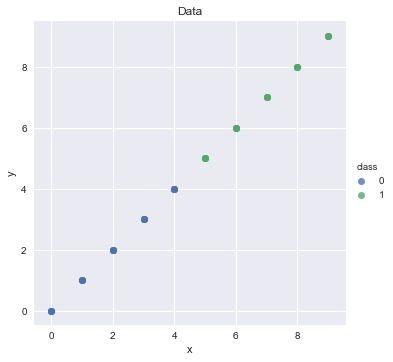

In [9]:
# libraries: keras, pandas, numpy, matplotlib, seaborn

# for compatibility
from __future__ import absolute_import
from __future__ import print_function

# for manipulating data
import pandas as pd
import numpy as np
from keras.utils import np_utils # for y values

# for plotting
%matplotlib inline
import seaborn as sns

# for keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout


# set data
data = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 1],
    [7, 7, 1],
    [8, 8, 1],
    [9, 9, 1],
])

data = np.vstack((data, data, data, data)) # just for sufficient input
data = pd.DataFrame(data, columns = ['x', 'y', 'class'])

# split X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

# get dimensions of input and output
dim_of_input = X.shape[1]
dim_of_output = np.max(y) + 1

# set y categorical
y = np_utils.to_categorical(y, dim_of_output)

# plot data
sns.lmplot('x', 'y', data, 'class', fit_reg=False).set(title='Data')
None

batch_size: 128
count_of_epoch: 1700
verbose: 0



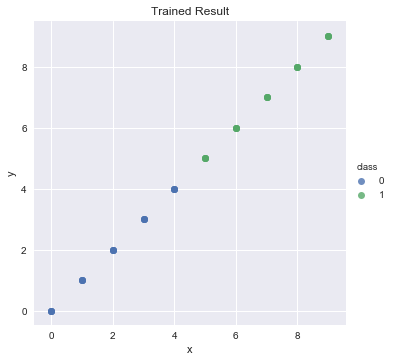

In [15]:
# set constants
batch_size = 128
dim_of_middle = 100
dropout = 0.2
count_of_epoch = 1700
verbose = 0
print('batch_size:', batch_size)
print('count_of_epoch:', count_of_epoch)
print('verbose:', verbose)
print()

# set model
model = Sequential()
model.add(Dense(dim_of_middle, input_dim=dim_of_input, kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dim_of_middle, kernel_initializer='uniform', activation='tanh'))
model.add(Dropout(dropout))
model.add(Dense(dim_of_output, kernel_initializer='uniform', activation='softmax'))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

# train
model.fit(
    X, y,
    validation_split=0.2,
    batch_size=batch_size, epochs=count_of_epoch, verbose=verbose)

# plot trained result
data_ = data.copy()
data_['class'] = model.predict_classes(X, verbose=0)
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Trained Result')
None

loss: 0.0606226563454
accuracy: 1.0

prediction of [1, 1]: [0]
prediction of [8, 8]: [1]


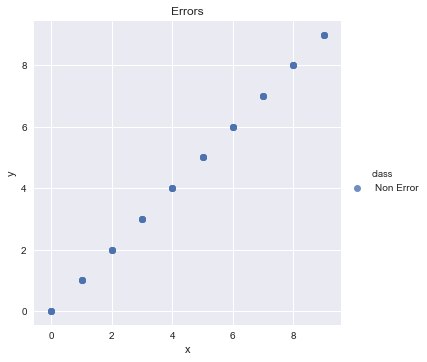

In [16]:
# evaluate
loss, accuracy = model.evaluate(X, y, verbose=verbose)
print('loss:', loss)
print('accuracy:', accuracy)
print()

# predict
# model.predict_classes(X, verbose=verbose)
print('prediction of [1, 1]:', model.predict_classes(np.array([[1, 1]]), verbose=verbose))
print('prediction of [8, 8]:', model.predict_classes(np.array([[8, 8]]), verbose=verbose))

# plot errors
data_['class'] = [ 'Error' if is_error else 'Non Error' for is_error in data['class'] != data_['class']]
sns.lmplot('x', 'y', data_, 'class', fit_reg=False).set(title='Errors')
None

### Visualize Filters

We take a look at what deep convolutional neural networks (convnets) really learn, and how they understand the images we feed them. We will use Keras to visualize inputs that maximize the activation of the filters in different layers of the VGG16 architecture, trained on ImageNet.

VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. It was used to win the ImageNet ILSVRC (Large Scale Visual Recognition Challenge) competition in 2014.
The ILSVRC evaluates algorithms for object detection and image classification at large scale.<br>
To this day is it still considered to be an excellent vision model, although it has been somewhat outperformed by more revent advances.

We want to display what sort of input (they're not unique) maximizes each filter in each layer, giving us a neat visualization of the convnet's modular-hierarchical decomposition of its visual space.

In [4]:
'''Visualization of the filters of VGG16, via gradient ascent in input space.
This script can run on CPU in a few minutes (with the TensorFlow backend).
Results example: http://i.imgur.com/4nj4KjN.jpg
'''
from __future__ import print_function

from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

# dimensions of the generated pictures for each filter.
img_width = 128
img_height = 128

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'block5_conv1'

# util function to convert a tensor into a valid image


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# defining the VGG16 model in Keras
# load a set of weights pre-trained on ImageNet dataset
# only go up to the last convolutional layer for arbitrary input sizes
model = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

model.summary()

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)


kept_filters = []
for filter_index in range(0, 200):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation of
    # the nth filter (filter_index) of the layer considered (layer_name)
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 128

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

# we will stich the best 64 filters on a 8 x 8 grid.
n = 8

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imsave('stitched_filters_%dx%d.png' % (n, n), stitched_filters)

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0      

Current loss value: 1281.94
Current loss value: 1337.66
Current loss value: 1394.93
Filter 8 processed in 13s
Processing filter 9
Current loss value: 13.6833
Current loss value: 55.8288
Current loss value: 86.0705
Current loss value: 122.628
Current loss value: 168.689
Current loss value: 229.909
Current loss value: 279.108
Current loss value: 329.48
Current loss value: 403.989
Current loss value: 462.027
Current loss value: 506.369
Current loss value: 554.33
Current loss value: 590.236
Current loss value: 644.05
Current loss value: 684.668
Current loss value: 736.1
Current loss value: 769.723
Current loss value: 814.091
Current loss value: 857.361
Current loss value: 897.9
Filter 9 processed in 13s
Processing filter 10
Current loss value: 8.86461
Current loss value: 13.4067
Current loss value: 34.6053
Current loss value: 63.0463
Current loss value: 103.868
Current loss value: 148.514
Current loss value: 175.742
Current loss value: 213.8
Current loss value: 264.353
Current loss value: 

Current loss value: 658.428
Filter 25 processed in 13s
Processing filter 26
Current loss value: 0.0
Filter 26 processed in 1s
Processing filter 27
Current loss value: 2.78984
Current loss value: 5.11771
Current loss value: 17.1885
Current loss value: 33.7786
Current loss value: 63.8487
Current loss value: 95.7518
Current loss value: 140.395
Current loss value: 195.654
Current loss value: 253.255
Current loss value: 307.241
Current loss value: 377.244
Current loss value: 453.853
Current loss value: 534.509
Current loss value: 616.213
Current loss value: 700.302
Current loss value: 782.525
Current loss value: 858.481
Current loss value: 940.272
Current loss value: 1010.97
Current loss value: 1089.33
Filter 27 processed in 13s
Processing filter 28
Current loss value: 1.06553
Current loss value: 31.3072
Current loss value: 104.166
Current loss value: 185.806
Current loss value: 252.866
Current loss value: 303.9
Current loss value: 345.979
Current loss value: 395.899
Current loss value: 434

Current loss value: 63.3157
Current loss value: 146.465
Current loss value: 260.286
Current loss value: 359.543
Current loss value: 447.882
Current loss value: 516.227
Current loss value: 583.136
Current loss value: 653.47
Current loss value: 709.473
Current loss value: 780.778
Current loss value: 835.789
Current loss value: 910.41
Current loss value: 969.05
Current loss value: 1033.13
Current loss value: 1094.93
Current loss value: 1159.8
Current loss value: 1218.78
Current loss value: 1286.46
Current loss value: 1338.95
Filter 42 processed in 13s
Processing filter 43
Current loss value: 7.23141
Current loss value: 42.1992
Current loss value: 94.9333
Current loss value: 130.342
Current loss value: 166.87
Current loss value: 201.827
Current loss value: 242.448
Current loss value: 274.365
Current loss value: 308.419
Current loss value: 338.739
Current loss value: 372.006
Current loss value: 402.93
Current loss value: 440.272
Current loss value: 472.139
Current loss value: 509.557
Curren

Current loss value: 321.624
Current loss value: 376.41
Current loss value: 425.212
Current loss value: 466.201
Current loss value: 518.426
Current loss value: 550.277
Current loss value: 599.924
Current loss value: 632.1
Current loss value: 673.688
Current loss value: 702.028
Current loss value: 746.16
Current loss value: 777.535
Current loss value: 816.634
Current loss value: 843.62
Current loss value: 887.003
Filter 58 processed in 13s
Processing filter 59
Current loss value: 40.6914
Current loss value: 129.037
Current loss value: 203.483
Current loss value: 276.184
Current loss value: 340.607
Current loss value: 394.943
Current loss value: 446.31
Current loss value: 494.469
Current loss value: 542.534
Current loss value: 593.714
Current loss value: 639.824
Current loss value: 691.702
Current loss value: 736.417
Current loss value: 786.338
Current loss value: 834.726
Current loss value: 885.643
Current loss value: 937.868
Current loss value: 989.459
Current loss value: 1043.75
Curren

Current loss value: 934.198
Current loss value: 991.91
Current loss value: 1036.19
Current loss value: 1089.14
Filter 79 processed in 13s
Processing filter 80
Current loss value: 3.63451
Current loss value: 47.0125
Current loss value: 90.8534
Current loss value: 133.044
Current loss value: 165.922
Current loss value: 215.056
Current loss value: 253.798
Current loss value: 296.914
Current loss value: 332.043
Current loss value: 370.915
Current loss value: 401.667
Current loss value: 442.595
Current loss value: 480.801
Current loss value: 518.218
Current loss value: 556.065
Current loss value: 591.453
Current loss value: 626.984
Current loss value: 661.574
Current loss value: 692.79
Current loss value: 730.943
Filter 80 processed in 13s
Processing filter 81
Current loss value: 2.08758
Current loss value: 16.7337
Current loss value: 45.1779
Current loss value: 80.5223
Current loss value: 127.737
Current loss value: 172.732
Current loss value: 211.114
Current loss value: 248.709
Current lo

Current loss value: 661.258
Current loss value: 703.398
Current loss value: 739.366
Current loss value: 778.024
Current loss value: 818.414
Filter 97 processed in 13s
Processing filter 98
Current loss value: 0.191661
Current loss value: 0.0698215
Current loss value: 17.2666
Current loss value: 53.1794
Current loss value: 89.4344
Current loss value: 120.211
Current loss value: 161.623
Current loss value: 202.728
Current loss value: 234.619
Current loss value: 273.113
Current loss value: 308.839
Current loss value: 341.941
Current loss value: 377.561
Current loss value: 417.559
Current loss value: 460.843
Current loss value: 516.541
Current loss value: 574.423
Current loss value: 631.959
Current loss value: 682.094
Current loss value: 738.046
Filter 98 processed in 13s
Processing filter 99
Current loss value: 0.0
Filter 99 processed in 1s
Processing filter 100
Current loss value: 0.0
Filter 100 processed in 1s
Processing filter 101
Current loss value: 1.13327
Current loss value: 8.79333


Current loss value: 0.0902434
Current loss value: 32.3288
Current loss value: 85.7966
Current loss value: 143.109
Current loss value: 197.608
Current loss value: 239.036
Current loss value: 302.904
Current loss value: 356.07
Current loss value: 405.257
Current loss value: 460.165
Current loss value: 509.431
Current loss value: 565.96
Current loss value: 610.721
Current loss value: 669.293
Current loss value: 722.635
Current loss value: 776.507
Current loss value: 823.757
Current loss value: 878.326
Current loss value: 929.847
Current loss value: 980.291
Filter 120 processed in 14s
Processing filter 121
Current loss value: 3.72151
Current loss value: 17.7027
Current loss value: 44.1206
Current loss value: 76.7585
Current loss value: 112.071
Current loss value: 146.527
Current loss value: 184.728
Current loss value: 226.23
Current loss value: 265.205
Current loss value: 298.061
Current loss value: 331.622
Current loss value: 365.5
Current loss value: 397.776
Current loss value: 435.164
C

Current loss value: 181.084
Current loss value: 227.495
Current loss value: 280.743
Current loss value: 321.163
Current loss value: 362.984
Current loss value: 396.477
Current loss value: 435.102
Current loss value: 470.707
Current loss value: 509.246
Current loss value: 545.459
Current loss value: 577.666
Current loss value: 610.95
Current loss value: 643.016
Current loss value: 673.296
Current loss value: 709.283
Filter 135 processed in 13s
Processing filter 136
Current loss value: 7.88142
Current loss value: 35.3012
Current loss value: 76.8522
Current loss value: 128.254
Current loss value: 182.636
Current loss value: 235.804
Current loss value: 293.274
Current loss value: 345.261
Current loss value: 396.504
Current loss value: 449.938
Current loss value: 505.6
Current loss value: 562.774
Current loss value: 615.957
Current loss value: 670.463
Current loss value: 729.23
Current loss value: 787.897
Current loss value: 848.149
Current loss value: 911.842
Current loss value: 972.662
Cu

Current loss value: 516.773
Current loss value: 559.79
Current loss value: 599.739
Current loss value: 641.155
Current loss value: 681.45
Current loss value: 717.172
Current loss value: 758.94
Current loss value: 797.47
Current loss value: 838.921
Filter 150 processed in 14s
Processing filter 151
Current loss value: 0.213318
Current loss value: 0.0
Filter 151 processed in 2s
Processing filter 152
Current loss value: 5.05307
Current loss value: 28.1593
Current loss value: 33.6059
Current loss value: 61.738
Current loss value: 92.8141
Current loss value: 161.462
Current loss value: 199.169
Current loss value: 219.119
Current loss value: 298.818
Current loss value: 326.52
Current loss value: 359.345
Current loss value: 424.577
Current loss value: 451.079
Current loss value: 487.62
Current loss value: 538.5
Current loss value: 561.479
Current loss value: 599.125
Current loss value: 629.996
Current loss value: 679.065
Current loss value: 706.068
Filter 152 processed in 14s
Processing filter

Current loss value: 381.773
Current loss value: 413.888
Current loss value: 440.044
Current loss value: 471.658
Current loss value: 497.951
Current loss value: 533.059
Current loss value: 560.631
Current loss value: 594.689
Current loss value: 624.129
Filter 167 processed in 13s
Processing filter 168
Current loss value: 3.45529
Current loss value: 17.9597
Current loss value: 59.8018
Current loss value: 106.852
Current loss value: 162.199
Current loss value: 210.219
Current loss value: 262.751
Current loss value: 311.918
Current loss value: 361.851
Current loss value: 413.56
Current loss value: 453.604
Current loss value: 497.516
Current loss value: 538.957
Current loss value: 579.673
Current loss value: 619.737
Current loss value: 661.35
Current loss value: 702.872
Current loss value: 748.879
Current loss value: 788.822
Current loss value: 832.784
Filter 168 processed in 13s
Processing filter 169
Current loss value: 0.0
Filter 169 processed in 1s
Processing filter 170
Current loss valu

Current loss value: 321.697
Current loss value: 342.951
Current loss value: 374.284
Current loss value: 401.703
Current loss value: 435.132
Current loss value: 463.967
Current loss value: 496.585
Current loss value: 525.707
Current loss value: 559.193
Current loss value: 582.66
Current loss value: 621.753
Filter 185 processed in 14s
Processing filter 186
Current loss value: 1.75939
Current loss value: 24.2455
Current loss value: 74.225
Current loss value: 125.663
Current loss value: 169.741
Current loss value: 220.574
Current loss value: 259.427
Current loss value: 307.558
Current loss value: 353.976
Current loss value: 396.187
Current loss value: 434.653
Current loss value: 473.838
Current loss value: 506.599
Current loss value: 547.797
Current loss value: 580.162
Current loss value: 616.903
Current loss value: 653.013
Current loss value: 689.849
Current loss value: 726.351
Current loss value: 768.149
Filter 186 processed in 14s
Processing filter 187
Current loss value: 12.0646
Curren

<img src="http://i.imgur.com/4nj4KjN.jpg">

#### Examples of different filters

<img src="https://blog.keras.io/img/vgg16_filters_overview.jpg">

A remarkable observation: a lot of these filters are identical, but rotated by some non-random factor (typically 90 degrees). This means that we could potentially compress the number of filters used in a convnet by a large factor by finding a way to make the convolution filters rotation-invariant. I can see a few ways this could be achieved - it's an interesting research direction.

Shockingly, the rotation observation holds true even for relatively high-level filters, such as those in conv4_1.

In the highest layers we start to recognize textures similar to that found in the objects that network was trained to classify, such as feathers, eyes, etc.

### Deep Dreaming

Another fun thing to do is to apply these filters to photos (rather than to noisy all-gray inputs). This is the principle of Deep Dreams, popularized by Google last year. By picking specific combinations of filters rather than single filters, you can achieve quite pretty results. If you are interested in this, you could also check out the <a href="https://github.com/fchollet/keras/blob/master/examples/deep_dream.py">Deep Dream example in Keras</a>, and the <a href="https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html">Google blog post</a> that introduced the technique.

Artificial Neural Networks are very good at image classification, but we actually understand little of why certain models work and others don’t.
One of the challenges is understanding what exactly goes on at each layer. We know that after training, each layer progressively extracts higher and higher-level features of the image, until the final layer essentially makes a decision on what the image shows. For example, the first layer maybe looks for edges or corners. Intermediate layers interpret the basic features to look for overall shapes or components, like a door or a leaf. The final few layers assemble those into complete interpretations - these neurons activate in response to very complex things such as entire buildings or trees. 

We feed the network an arbitrary image or photo and let the network analyze the picture. We then pick a layer and ask the network to enhance whatever it detected.<br>
Each layer of the network deals with features at a different level of abstraction, so the complexity of features we generate depends on which layer we choose to enhance. For example, lower layers tend to produce strokes or simple ornament-like patterns, because those layers are sensitive to basic features such as edges and their orientations.<br>
If we choose higher-level layers, which identify more sophisticated features in images, complex features or even whole objects tend to emerge. We ask the network: "Whatever you see there, I want more of it!". So tell the network to maximize the activation of this layer.

In [5]:
from __future__ import print_function

from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import scipy
import argparse

from keras.applications import inception_v3
from keras import backend as K

base_image_path = "img/clouds.jpg"
result_prefix = "results/clouds"

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
settings = {
    'features': {
        'mixed2': 0.2,
        'mixed3': 0.5,
        'mixed4': 2.,
        'mixed5': 1.5,
    },
}


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

K.set_learning_phase(0)

# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
dream = model.input
print('Model loaded.')

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    assert layer_name in layer_dict.keys(), 'Layer ' + layer_name + ' not found in model.'
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        loss += coeff * K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
    else:
        loss += coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)


def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values


def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)


def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)


"""Process:
- Load the original image.
- Define a number of processing scales (i.e. image shapes),
    from smallest to largest.
- Resize the original image to the smallest scale.
- For every scale, starting with the smallest (i.e. current one):
    - Run gradient ascent
    - Upscale image to the next scale
    - Reinject the detail that was lost at upscaling time
- Stop when we are back to the original size.
To obtain the detail lost during upscaling, we simply
take the original image, shrink it down, upscale it,
and compare the result to the (resized) original image.
"""


# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 5.

img = preprocess_image(base_image_path)
if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

save_img(img, fname=result_prefix + '.png')
print(base_image_path)
print("Done.")

Model loaded.


/home/anne/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Processing image shape (224, 336)
..Loss value at 0 : 1.75582
..Loss value at 1 : 2.32746
..Loss value at 2 : 3.05959
..Loss value at 3 : 3.78578
..Loss value at 4 : 4.6106
Processing image shape (314, 471)
..Loss value at 0 : 2.75408
..Loss value at 1 : 3.78937
..Loss value at 2 : 4.82047
Processing image shape (440, 660)
..Loss value at 0 : 2.98697
..Loss value at 1 : 3.94282
..Loss value at 2 : 4.96125
img/clouds.jpg
Done.


#### Some Examples from Google

<img src="https://4.bp.blogspot.com/-FPDgxlc-WPU/VYIV1bK50HI/AAAAAAAAAlw/YIwOPjoulcs/s640/skyarrow.png"><br><br><br>
<img src="https://3.bp.blogspot.com/-4Uj3hPFupok/VYIT6s_c9OI/AAAAAAAAAlc/_yGdbbsmGiw/s640/ibis.png"><br><br><br>
<img src="https://4.bp.blogspot.com/-PK_bEYY91cw/VYIVBYw63uI/AAAAAAAAAlo/iUsA4leua10/s640/seurat-layout.png"><br><br><br>
<img src="https://2.bp.blogspot.com/-nxPKPYA8otk/VYIWRcpjZfI/AAAAAAAAAmE/8dSuxLnSNQ4/s640/image-dream-map.png"><br><br><br>
<img src="https://1.bp.blogspot.com/-XZ0i0zXOhQk/VYIXdyIL9kI/AAAAAAAAAmQ/UbA6j41w28o/s640/building-dreams.png">

### References
XOR Tutorial: https://blog.thoughtram.io/machine-learning/2016/09/23/beginning-ml-with-keras-and-tensorflow.html<br>
Data Tutorial: https://gist.github.com/ermaker/9be651e0117ff2595679<br>
Visualize Filters: https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py<br>
Deep Dreaming: https://github.com/fchollet/keras/blob/master/examples/deep_dream.py